In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [3]:
athlete = pd.read_csv("dataset/athlete_events.csv")
regions = pd.read_csv("dataset/noc_regions.csv")

In [5]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [9]:
df = pd.merge(athlete,regions,on="NOC")

In [11]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [13]:
df.shape

(270767, 17)

In [15]:
df.duplicated().sum()

1385

In [16]:
df.drop_duplicates(inplace=True)

In [19]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9303
Height     58726
Weight     61437
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229619
region        21
notes     264347
dtype: int64

In [21]:
df["Medal"].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [27]:
df["Medal"].fillna("No_Medal" , inplace=True)

In [25]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medal,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No_Medal,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No_Medal,Netherlands,NaN


In [29]:
df["Season"].value_counts()

Season
Summer    220818
Winter     48564
Name: count, dtype: int64

In [31]:
summer = df[df["Season"] == "Summer"]
winter= df[df["Season"] == "Winter"]

In [33]:
summer.shape

(220818, 17)

In [35]:
winter.shape

(48564, 17)

## Season Wise_Medal Tally

In [38]:
medal_count_summer = summer.groupby(["NOC" , "Medal"]).size().reset_index(name="count")

In [40]:
medal_count_summer

,NOC,Medal,count
0,AFG,Bronze,2
1,AFG,No_Medal,124
2,AHO,No_Medal,73
3,AHO,Silver,1
4,ALB,No_Medal,63
...,...,...,...
579,ZAM,Silver,1
580,ZIM,Bronze,1
581,ZIM,Gold,17
582,ZIM,No_Medal,287


In [42]:
medal_pivot_summer = medal_count_summer.pivot(index="NOC" , columns="Medal" , values="count").fillna(0)

In [44]:
medal_pivot_summer 

Medal,Bronze,Gold,No_Medal,Silver
NOC,,,,
AFG,2.0,0.0,124.0,0.0
AHO,0.0,0.0,73.0,1.0
ALB,0.0,0.0,63.0,0.0
ALG,8.0,5.0,522.0,4.0
AND,0.0,0.0,53.0,0.0
...,...,...,...,...
YEM,0.0,0.0,32.0,0.0
YMD,0.0,0.0,5.0,0.0
YUG,92.0,130.0,1659.0,161.0


In [46]:
medal_pivot_summer = medal_pivot_summer.astype(int)

In [48]:
medal_pivot_summer 

Medal,Bronze,Gold,No_Medal,Silver
NOC,,,,
AFG,2,0,124,0
AHO,0,0,73,1
ALB,0,0,63,0
ALG,8,5,522,4
AND,0,0,53,0
...,...,...,...,...
YEM,0,0,32,0
YMD,0,0,5,0
YUG,92,130,1659,161


In [50]:
medal_pivot_summer ["TotaL_Medal"] = medal_pivot_summer[["Gold" , "Silver" , "Bronze"]].sum(axis=1)

In [52]:
medal_pivot_summer 

Medal,Bronze,Gold,No_Medal,Silver,TotaL_Medal
NOC,,,,,
AFG,2,0,124,0,2
AHO,0,0,73,1,1
ALB,0,0,63,0,0
ALG,8,5,522,4,17
AND,0,0,53,0,0
...,...,...,...,...,...
YEM,0,0,32,0,0
YMD,0,0,5,0,0
YUG,92,130,1659,161,383


In [54]:
medal_pivot_summer .sort_values(by=["Gold" , "Silver" , "Bronze"] , ascending=False).head(30)

Medal,Bronze,Gold,No_Medal,Silver,TotaL_Medal
NOC,,,,,
USA,1197,2472,9813,1333,5002
URS,596,832,2559,635,2063
GBR,620,635,8792,729,1984
GER,649,592,5747,538,1779
ITA,454,518,6724,474,1446
FRA,587,463,8809,567,1617
HUN,363,432,4951,328,1123
SWE,358,354,4920,396,1108
AUS,510,342,5787,452,1304


In [56]:
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medal,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No_Medal,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No_Medal,Netherlands,NaN


In [58]:
summer = summer.drop_duplicates(subset=["Team" ,"NOC" , "Games" , "Year" , "City" , "Sport","Event"])

In [60]:
summer.shape

(98657, 17)

In [62]:
winter = winter.drop_duplicates(subset=["Team" ,"NOC" , "Games" , "Year" , "City" , "Sport","Event"])

In [64]:
winter.shape

(16956, 17)

In [66]:
medal_count_winter = winter.groupby(["NOC" , "Medal"]).size().reset_index(name="count")

In [68]:
medal_count_winter.head()

,NOC,Medal,count
0,AHO,No_Medal,3
1,ALB,No_Medal,7
2,ALG,No_Medal,9
3,AND,No_Medal,69
4,ARG,No_Medal,169


In [106]:
medal_pivot_winter = medal_count_winter.pivot(index="NOC" , columns="Medal" , values="count").fillna(0)

In [108]:
medal_pivot_winter 

Medal,Bronze,Gold,No_Medal,Silver
NOC,,,,
AHO,0.0,0.0,3.0,0.0
ALB,0.0,0.0,7.0,0.0
ALG,0.0,0.0,9.0,0.0
AND,0.0,0.0,69.0,0.0
ARG,0.0,0.0,169.0,0.0
...,...,...,...,...
USA,44.0,39.0,894.0,48.0
UZB,0.0,1.0,26.0,0.0
VEN,0.0,0.0,5.0,0.0


In [110]:
medal_pivot_winter = medal_pivot_winter.astype(int)

In [112]:
medal_pivot_winter 

Medal,Bronze,Gold,No_Medal,Silver
NOC,,,,
AHO,0,0,3,0
ALB,0,0,7,0
ALG,0,0,9,0
AND,0,0,69,0
ARG,0,0,169,0
...,...,...,...,...
USA,44,39,894,48
UZB,0,1,26,0
VEN,0,0,5,0


In [92]:
medal_pivot_winter["TotaL_Medal"] = medal_pivot_winter[["Gold" , "Silver" , "Bronze"]].sum(axis=1)

In [94]:
medal_pivot_winter .sort_values(by=["Gold" , "Silver" , "Bronze"] , ascending=False).head(30)

Medal,Bronze,Gold,No_Medal,Silver,TotaL_Medal
NOC,,,,,
NOR,48,58,529,43,149
URS,24,46,216,24,94
CAN,25,43,770,34,102
USA,44,39,894,48,131
GER,36,39,534,38,113
RUS,21,28,388,22,71
SWE,31,23,560,22,76
AUT,24,21,594,31,76
ITA,25,19,739,17,61


In [82]:
## VS CODE 

 ## COUNTRY_WISE MEDAL TALLY

In [96]:
medal_pivot_summer

Medal,Bronze,Gold,No_Medal,Silver,TotaL_Medal
NOC,,,,,
AFG,2,0,124,0,2
AHO,0,0,73,1,1
ALB,0,0,63,0,0
ALG,8,5,522,4,17
AND,0,0,53,0,0
...,...,...,...,...,...
YEM,0,0,32,0,0
YMD,0,0,5,0,0
YUG,92,130,1659,161,383


In [114]:
def fetch_noc(noc, pivot_table):
    if noc in pivot_table.index:
        details={
            "Gold ": pivot_table.loc[noc,"Gold"],
            "Silver" : pivot_table.loc[noc,"Silver"],
            "Bronze" : pivot_table.loc[noc,"Bronze"],
            "Total Medal" : pivot_table.loc[noc,"TotaL_Medal"],
        }
        return details
    else:
        print("No Noc exist")


In [122]:
fetch_noc("USA" , medal_pivot_summer)

{'Gold ': 2472, 'Silver': 1333, 'Bronze': 1197, 'Total Medal': 5002}

### YEAR WISE SEARCHING

In [125]:
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medal,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No_Medal,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No_Medal,Netherlands,NaN


In [138]:
summer.shape


(98637, 17)

In [133]:
summer.isnull().sum()

ID            0
Name          0
Sex           0
Age        3118
Height    17823
Weight    18180
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        0
notes     96593
dtype: int64

In [131]:
summer.dropna(subset=["region"], inplace=True)

In [177]:
medal_count = summer.groupby(["Year","region","Medal"]).size().unstack(fill_value=0)

In [179]:
medal_count

Medal                         Bronze  Gold  No_Medal  Silver
Year region                                                 
1896 Australia                     1     2         2       0
     Austria                       2     2         3       1
     Denmark                       3     1         6       2
     France                        2     1        11       4
     Germany                       1     4        21       1
...                              ...   ...       ...     ...
2016 Virgin Islands, British       0     0         4       0
     Virgin Islands, US            0     0         7       0
     Yemen                         0     0         3       0
     Zambia                        0     0         7       0
     Zimbabwe                      0     0        13       0

[2769 rows x 4 columns]

In [181]:
medal_count = medal_count.reset_index()

In [183]:
medal_count

Medal,Year,region,Bronze,Gold,No_Medal,Silver
0,1896,Australia,1,2,2,0
1,1896,Austria,2,2,3,1
2,1896,Denmark,3,1,6,2
3,1896,France,2,1,11,4
4,1896,Germany,1,4,21,1
...,...,...,...,...,...,...
2764,2016,"Virgin Islands, British",0,0,4,0
2765,2016,"Virgin Islands, US",0,0,7,0
2766,2016,Yemen,0,0,3,0
2767,2016,Zambia,0,0,7,0


In [187]:
medal_count["Total_Medal"] = medal_count["Gold"] + medal_count["Silver"] + medal_count["Bronze"]

In [189]:
medal_count

Medal,Year,region,Bronze,Gold,No_Medal,Silver,Total_Medal
0,1896,Australia,1,2,2,0,3
1,1896,Austria,2,2,3,1,5
2,1896,Denmark,3,1,6,2,6
3,1896,France,2,1,11,4,7
4,1896,Germany,1,4,21,1,6
...,...,...,...,...,...,...,...
2764,2016,"Virgin Islands, British",0,0,4,0,0
2765,2016,"Virgin Islands, US",0,0,7,0,0
2766,2016,Yemen,0,0,3,0,0
2767,2016,Zambia,0,0,7,0,0


In [207]:
def plot_medals(year , country , df):
    
    filtered_df = df[(df["Year"]==year )& (df["region"]==country)]
    
    gold = filtered_df["Gold"].values[0]
    silver = filtered_df["Silver"].values[0]
    bronze = filtered_df["Bronze"].values[0]
    total_medal= filtered_df["Total_Medal"].values[0]
    
    fig,ax = plt.subplots()
    medals=["Gold","Silver","Bronze","Total_Medal"]
    counts = [gold, silver, bronze,total_medal]
    ax.bar(medals,counts,color=["gold","silver","brown" ,"green"])
    plt.show()

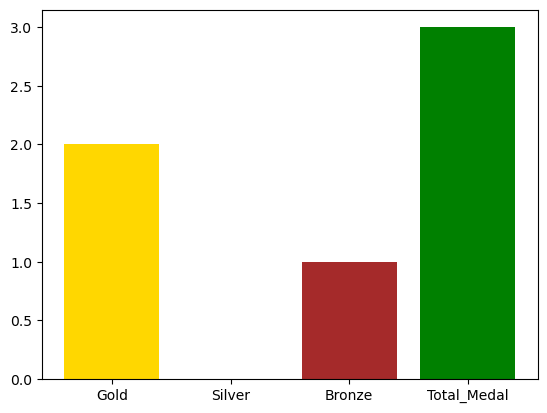

In [209]:
plot_medals(1896, "Australia" , medal_count)

#### YEAR WISE PROGRESS OF COUNTRY

In [212]:
medal_count

Medal,Year,region,Bronze,Gold,No_Medal,Silver,Total_Medal
0,1896,Australia,1,2,2,0,3
1,1896,Austria,2,2,3,1,5
2,1896,Denmark,3,1,6,2,6
3,1896,France,2,1,11,4,7
4,1896,Germany,1,4,21,1,6
...,...,...,...,...,...,...,...
2764,2016,"Virgin Islands, British",0,0,4,0,0
2765,2016,"Virgin Islands, US",0,0,7,0,0
2766,2016,Yemen,0,0,3,0,0
2767,2016,Zambia,0,0,7,0,0


In [220]:
def plot_year_progress(country , df):
    filtered_df = df[df["region"] == country]
    fig,ax = plt.subplots()
    ax.plot(filtered_df["Year"] , filtered_df["Gold"] , color="Gold" , label="GOLD" , marker="o" , linestyle="-")
    ax.plot(filtered_df["Year"] , filtered_df["Silver"] , color="silver" , label="SILVER" , marker="o" , linestyle="-")
    ax.plot(filtered_df["Year"] , filtered_df["Bronze"] , color="BROWN" , label="BRONZE" , marker="o" , linestyle="-")
    ax.plot(filtered_df["Year"] , filtered_df["Total_Medal"] , color="green" , label="TOTAL_MEDALS" , marker="o" , linestyle="-")
    ax.legend()
    plt.show()

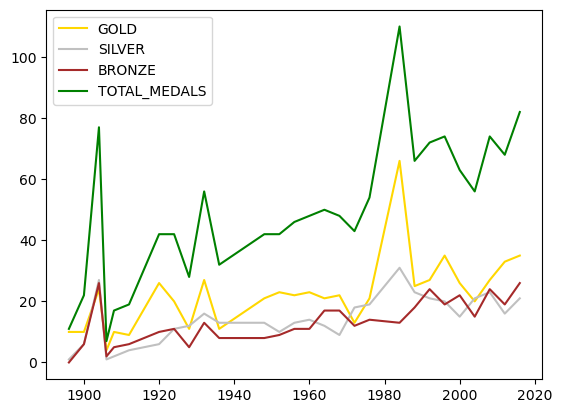

In [222]:
plot_year_progress("USA", medal_count) 